In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#After importing libraries, we will also import the dataset that will be used
df=pd.read_csv('D:\PYTHON\ML\Heart_disease_statlog.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
265,52,1,2,172,199,1,0,162,0,0.5,0,0,3,0
266,44,1,1,120,263,0,0,173,0,0.0,0,0,3,0
267,56,0,1,140,294,0,2,153,0,1.3,1,0,1,0
268,57,1,3,140,192,0,0,148,0,0.4,1,0,2,0
269,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
#As can be seen in the data set 270 rows and 14 columns are present
df.shape

(270, 14)

In [7]:
df['target'].unique()

array([1, 0], dtype=int64)

In [8]:
#here we can see there are no any null values in our given dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df[['age','sex','cp','trestbps']].groupby('trestbps').describe()

age                                                         sex  \
         count       mean        std   min    25%   50%    75%   max count   
trestbps                                                                     
94         2.0  45.000000   8.485281  39.0  42.00  45.0  48.00  51.0   2.0   
100        4.0  58.500000   6.557439  51.0  56.25  58.0  60.25  67.0   4.0   
101        1.0  46.000000        NaN  46.0  46.00  46.0  46.00  46.0   1.0   
102        2.0  51.000000  12.727922  42.0  46.50  51.0  55.50  60.0   2.0   
104        1.0  45.000000        NaN  45.0  45.00  45.0  45.00  45.0   1.0   
105        3.0  48.333333   8.736895  41.0  43.50  46.0  52.00  58.0   3.0   
106        1.0  67.000000        NaN  67.0  67.00  67.0  67.00  67.0   1.0   
108        6.0  52.333333   6.592926  44.0  48.25  53.0  54.00  63.0   6.0   
110       17.0  51.941176   9.141052  40.0  44.00  51.0  57.00  71.0  17.0   
112        9.0  51.666667  11.022704  41.0  44.00  47.0  58.00  71.0   9.0   
115        3.0  51.666667  13.316656  43.0  44.00  45.0  56.00  67.0   3.0   
117        1.0  60.000000        NaN  60.0  60.00  60.0  60.00  60.0   1.0   
118        7.0  45.714286  12.037639  34.0  36.50  44.0  50.50  68.0   7.0   
120       34.0  53.470588  10.216550  35.0  44.00  54.0  61.75  74.0  34.0   
122        3.0  48.333333   5.507571  43.0  45.50  48.0  51.00  54.0   3.0   
123        1.0  53.000000        NaN  53.0  53.00  53.0  53.00  53.0   1.0   
124        5.0  53.800000   6.016644  48.0  48.00  54.0  57.00  62.0   5.0   
125       10.0  59.000000   8.339997  51.0  52.50  57.0  63.00  77.0  10.0   
126        3.0  45.000000  12.489996  35.0  38.00  41.0  50.00  59.0   3.0   
128        9.0  56.111111   5.732461  45.0  52.00  57.0  58.00  64.0   9.0   
129        1.0  50.000000        NaN  50.0  50.00  50.0  50.00  50.0   1.0   
130       31.0  51.645161   9.275589  29.0  44.50  51.0  60.00  70.0  31.0   
132        6.0  53.833333   5.492419  43.0  54.25  55.5  56.75  58.0   6.0   
134        4.0  54.500000   5.196152  49.0  51.25  54.0  57.25  61.0   4.0   
135        6.0  56.166667   8.588752  41.0  54.25  57.0  62.00  65.0   6.0   
136        3.0  50.666667   8.082904  42.0  47.00  52.0  55.00  58.0   3.0   
138        9.0  52.555556   9.976361  35.0  46.00  53.0  61.00  65.0   9.0   
140       30.0  56.366667   8.864821  39.0  51.00  57.5  62.00  76.0  30.0   
142        3.0  48.000000   4.358899  45.0  45.50  46.0  49.50  53.0   3.0   
144        1.0  50.000000        NaN  50.0  50.00  50.0  50.00  50.0   1.0   
145        5.0  63.600000   3.911521  60.0  61.00  63.0  64.00  70.0   5.0   
146        1.0  58.000000        NaN  58.0  58.00  58.0  58.00  58.0   1.0   
148        1.0  42.000000        NaN  42.0  42.00  42.0  42.00  42.0   1.0   
150       17.0  57.411765   6.215493  43.0  57.00  58.0  61.00  66.0  17.0   
152        4.0  54.000000  11.224972  40.0  49.00  54.5  59.50  67.0   4.0   
155        1.0  65.000000        NaN  65.0  65.00  65.0  65.00  65.0   1.0   
156        1.0  70.000000        NaN  70.0  70.00  70.0  70.00  70.0   1.0   
158        1.0  60.000000        NaN  60.0  60.00  60.0  60.00  60.0   1.0   
160       11.0  64.000000   5.813777  54.0  60.50  66.0  68.00  71.0  11.0   
165        1.0  57.000000        NaN  57.0  57.00  57.0  57.00  57.0   1.0   
170        2.0  59.000000   0.000000  59.0  59.00  59.0  59.00  59.0   2.0   
172        1.0  52.000000        NaN  52.0  52.00  52.0  52.00  52.0   1.0   
174        1.0  59.000000        NaN  59.0  59.00  59.0  59.00  59.0   1.0   
178        2.0  62.500000   4.949747  59.0  60.75  62.5  64.25  66.0   2.0   
180        3.0  62.333333   6.658328  55.0  59.50  64.0  66.00  68.0   3.0   
192        1.0  54.000000        NaN  54.0  54.00  54.0  54.00  54.0   1.0   
200        1.0  56.000000        NaN  56.0  56.00  56.0  56.00  56.0   1.0   

                    ...               cp                                      \
              mean  ...   75% 

In [10]:
#it is interrelation between all variable whether it is inversly propertional or directly propertional.
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.099055,0.212322
sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.376936,0.297721
cp,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.266614,0.417436
trestbps,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.127273,0.155383
chol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.040317,0.118021
fbs,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.044770,-0.016319
restecg,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.004143,0.182091
thalach,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.241003,-0.418514
exang,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.319499,0.419303
oldpeak,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.325240,0.417967


Text(0.5, 1.0, 'target v/s sex')

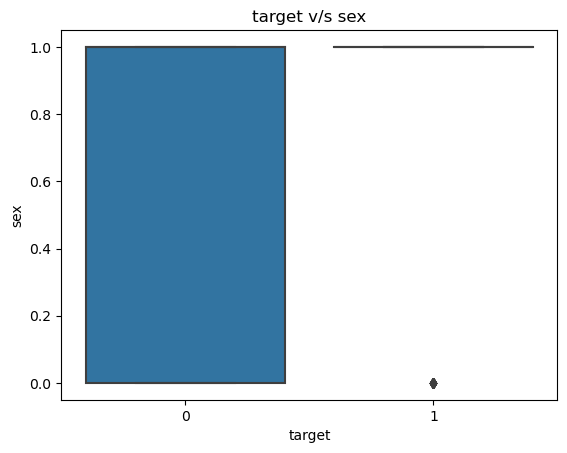

In [11]:
#draw a bax plot for target vs sex
ax = sns.boxplot(x='target', y='sex', data=df)
plt.title('target v/s sex')

Text(0.5, 1.0, 'target v/s age')

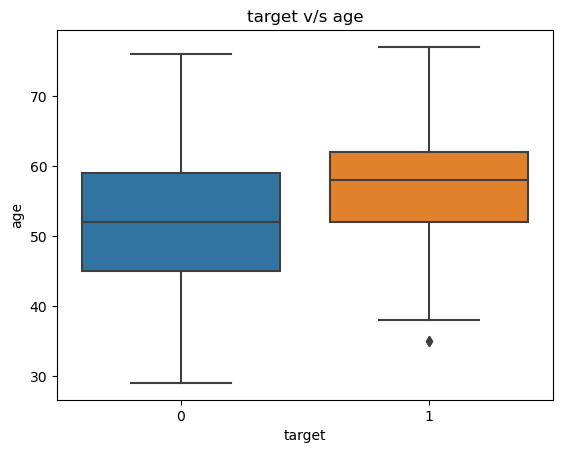

In [12]:
#draw a bax plot for target vs age
ax = sns.boxplot(x='target', y='age', data=df)
plt.title('target v/s age')

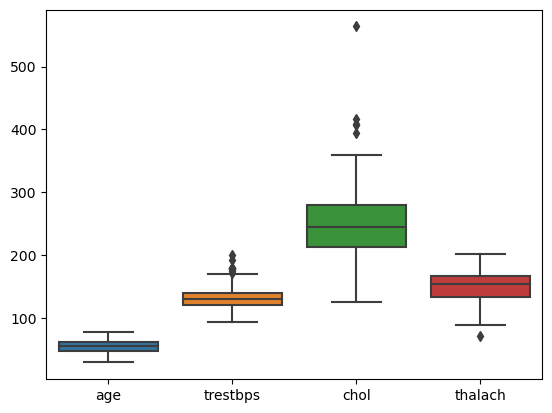

In [13]:
#draw a bax plot for age,trestbps,chol,thalach
sns.boxplot(data=df[['age','trestbps','chol','thalach']])
plt.show()

Text(0.5, 0, 'Age')

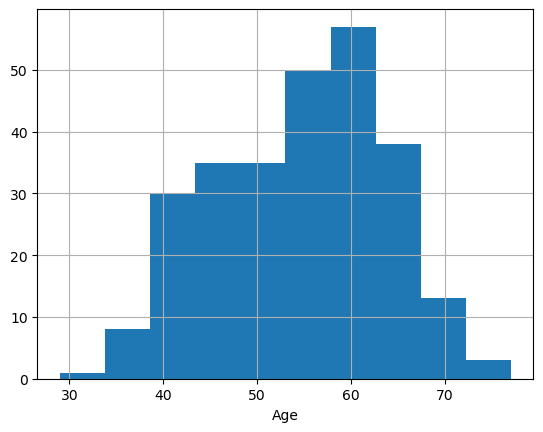

In [14]:
#draw a histogram on age column
df.age.hist()
plt.xlabel('Age')

<AxesSubplot:ylabel='target'>

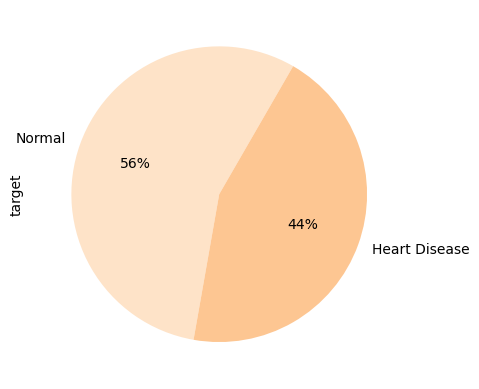

In [15]:
#draw a pie chart on target value 
df['target'].value_counts().plot.pie( x ="Heart disease" ,y ='no.of patients', autopct = "%1.0f%%",labels=["Normal","Heart Disease"], startangle = 60,colors = sns.color_palette('Oranges'))

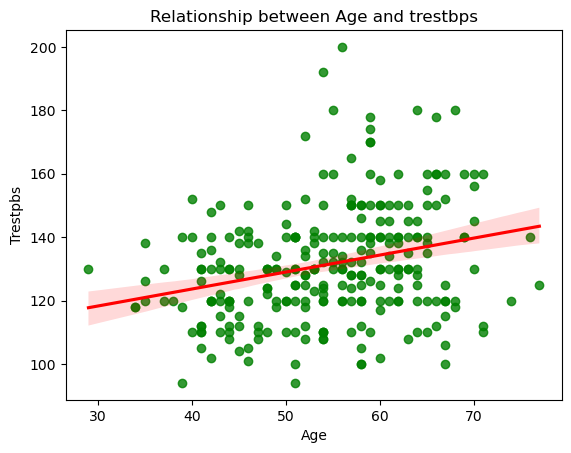

In [16]:
#regression chart on age vs trestbps

sns.regplot(x ='age',y ='trestbps',line_kws=dict(color='red'),scatter_kws=dict(color='green'),
            data = df)
plt.title('Relationship between Age and trestbps')
plt.xlabel('Age')
plt.ylabel('Trestpbs')
plt.show()

<AxesSubplot:>

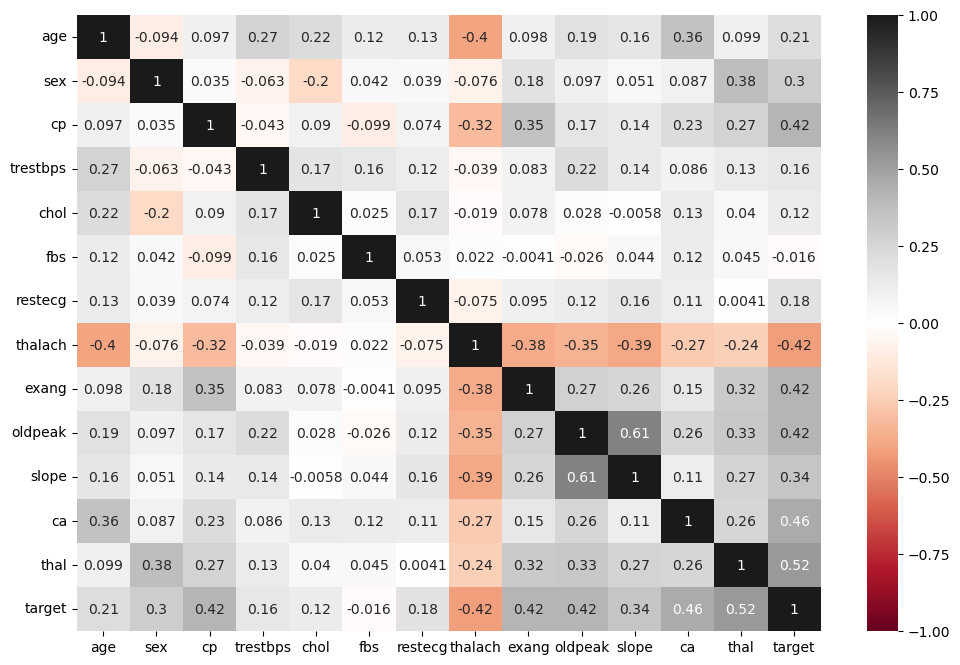

In [17]:
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,vmax=1.0, vmin=-1.0, cmap='RdGy', annot=True)

In [18]:
#Unecessary variables will be dropped in this section.
df = df.drop([ 'oldpeak', 'slope'], axis=1)

In [19]:
X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','ca','thal']]
y = df[['target']]

# model Building

# Logistic Regression

In [20]:
# standardization of data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [21]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis=1), 
                                                    df['target'], test_size=0.2, 
                                                    random_state=20)

In [22]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [23]:
predictions = logmodel.predict(X_test)
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,ca,thal
209,37,1,2,130,250,0,0,187,0,0,1
104,63,1,3,130,254,0,2,147,0,1,3
99,50,0,1,120,244,0,0,162,0,0,1
29,71,0,2,110,265,1,2,130,0,1,1
165,64,0,3,180,325,0,0,154,1,0,1


In [24]:
accuracy = logmodel.score(X_test,y_test)
print(accuracy*100,'%')

83.33333333333334 %


# Decision Tree classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state=50)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=50)

In [26]:
#predicting the test set result
y_pred=classifier.predict(X_test)

In [27]:
y_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [28]:
# making the confusion matrix, classification repot,accuracy
cm=confusion_matrix(y_test,y_pred)
print(cm)
acc=accuracy_score(y_test,y_pred)
print(acc*100,"%")
print(classification_report(y_test,y_pred))

[[19  6]
 [ 7 22]]
75.92592592592592 %
              precision    recall  f1-score   support

           0       0.73      0.76      0.75        25
           1       0.79      0.76      0.77        29

    accuracy                           0.76        54
   macro avg       0.76      0.76      0.76        54
weighted avg       0.76      0.76      0.76        54



# naive bays classifier

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

In [31]:
accuracy=gnb.score(X_test, y_test)
print(accuracy*100,'%')
print()
print(classification_report(y_test,gnb_predictions))

77.77777777777779 %

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        25
           1       0.81      0.76      0.79        29

    accuracy                           0.78        54
   macro avg       0.78      0.78      0.78        54
weighted avg       0.78      0.78      0.78        54



In [32]:
cm=confusion_matrix(y_test, gnb_predictions)
print(cm)

[[20  5]
 [ 7 22]]


# SVM (Support vector machine) classifier

In [33]:
from sklearn.svm import SVC

In [34]:
# if the data is not linerarly seperable, the SVM use a kernal function to map the data into a higher-dimentional
#space where the classes are seperable. some common kernal function include linear, polynomiall and radial basis function.
model=SVC(kernel = 'linear', C = 1)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [35]:
svm_pred=model.predict(X_test)

In [36]:
print(svm_pred)

[0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0]


In [37]:
# model accuracy for X_test  
accuracy = model.score(X_test, y_test)
print(accuracy*100,'%')

79.62962962962963 %


# KNN (k-nearest neighbors) classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
# knn=KNeighbhorsClassifier(n_neighbors=20)
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [40]:
# accuracy on x_test
accuracy=knn.score(X_test, y_test)
print(accuracy*100,'%')

62.96296296296296 %


In [41]:
# creating confusion matrix with the help of the following script we can make predictions--
knn_prediction=knn.predict(X_test)

#next print result as follows

print(classification_report(knn_prediction,y_test))

cm=confusion_matrix(y_test, knn_prediction)
print(cm)

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        35
           1       0.48      0.74      0.58        19

    accuracy                           0.63        54
   macro avg       0.64      0.65      0.62        54
weighted avg       0.69      0.63      0.64        54

[[20  5]
 [15 14]]
